In [47]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

### Date-30th July 2020

In [70]:
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 8,1)
endDate=datetime(2020, 7, 30)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.head()

(245, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-08-01,INFY,EQ,793.65,786.45,788.40,764.40,770.25,768.85,774.33,10066407,7.794755e+14,216329,6020077,0.5980
2019-08-02,INFY,EQ,768.85,765.05,779.90,762.25,774.75,775.60,770.48,10838336,8.350680e+14,227612,6835374,0.6307
2019-08-05,INFY,EQ,775.60,772.60,785.90,768.65,776.80,776.70,777.83,9976238,7.759839e+14,281736,6166468,0.6181
2019-08-06,INFY,EQ,776.70,778.80,783.70,769.80,775.30,774.45,776.57,9331718,7.246766e+14,199427,6512914,0.6979
2019-08-07,INFY,EQ,774.45,778.90,783.45,772.35,776.05,776.10,778.99,5130457,3.996583e+14,157512,2955139,0.5760


In [71]:
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2020-07-24,INFY,EQ,907.95,903.25,925.75,903.25,921.20,922.85,915.28,18209670,1.666699e+15,240036,5807097,0.3189,2020-07-24
2020-07-27,INFY,EQ,922.85,921.55,952.80,918.65,947.15,948.45,939.16,16828218,1.580444e+15,278528,5906860,0.3510,2020-07-27
2020-07-28,INFY,EQ,948.45,946.00,967.55,941.20,960.60,962.85,953.58,15819466,1.508506e+15,220010,5480184,0.3464,2020-07-28
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890,2020-07-29
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773,2020-07-30


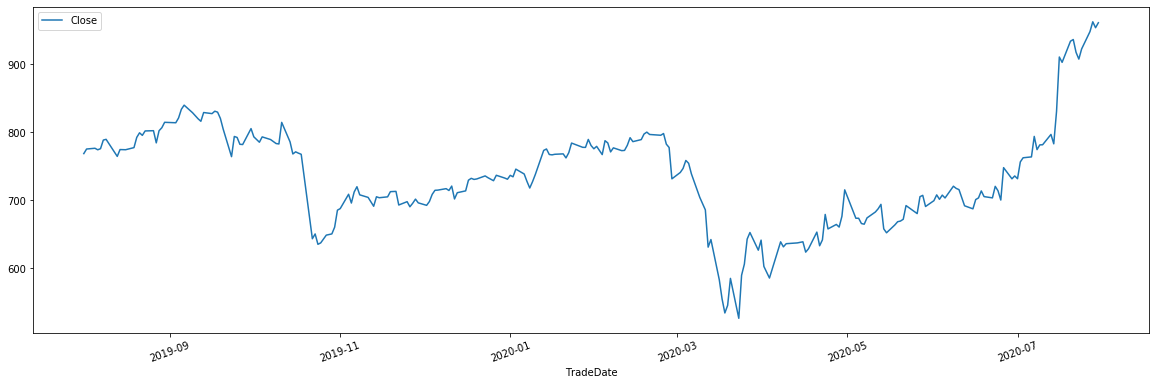

In [72]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [73]:
FullData=StockData[['Close']].values
FullData[0:5]

array([[768.85],
       [775.6 ],
       [776.7 ],
       [774.45],
       [776.1 ]])

In [74]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)

X[0:5]

array([[0.55545371],
       [0.57092117],
       [0.5734418 ],
       [0.56828598],
       [0.57206691]])

In [75]:
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [76]:
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(235, 10, 1)

In [77]:
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(235, 1)

In [78]:
TestingRecords=10

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(225, 10, 1)
(225, 1)
(10, 10, 1)
(10, 1)


In [80]:
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.55545371]
 [0.57092117]
 [0.5734418 ]
 [0.56828598]
 [0.57206691]
 [0.60105408]
 [0.6035747 ]
 [0.54605866]
 [0.56908799]
 [0.56851512]] --> [0.5756187]
[[0.57092117]
 [0.5734418 ]
 [0.56828598]
 [0.57206691]
 [0.60105408]
 [0.6035747 ]
 [0.54605866]
 [0.56908799]
 [0.56851512]
 [0.5756187 ]] --> [0.61021998]
[[0.5734418 ]
 [0.56828598]
 [0.57206691]
 [0.60105408]
 [0.6035747 ]
 [0.54605866]
 [0.56908799]
 [0.56851512]
 [0.5756187 ]
 [0.61021998]] --> [0.62557287]
[[0.56828598]
 [0.57206691]
 [0.60105408]
 [0.6035747 ]
 [0.54605866]
 [0.56908799]
 [0.56851512]
 [0.5756187 ]
 [0.61021998]
 [0.62557287]] --> [0.61697984]
[[0.57206691]
 [0.60105408]
 [0.6035747 ]
 [0.54605866]
 [0.56908799]
 [0.56851512]
 [0.5756187 ]
 [0.61021998]
 [0.62557287]
 [0.61697984]] --> [0.63187443]


In [81]:
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [83]:
import time
StartTime=time.time()

regressor.fit(X_train, y_train, batch_size = 4, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
57/57 [==============================] - 1s 14ms/step - loss: 0.1395
Epoch 2/100
57/57 [==============================] - 1s 14ms/step - loss: 0.0229
Epoch 3/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0189
Epoch 4/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0145
Epoch 5/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0116
Epoch 6/100
57/57 [==============================] - 1s 14ms/step - loss: 0.0099
Epoch 7/100
57/57 [==============================] - 1s 15ms/step - loss: 0.0092
Epoch 8/100
57/57 [==============================] - 1s 14ms/step - loss: 0.0087
Epoch 9/100
57/57 [==============================] - 1s 15ms/step - loss: 0.0086
Epoch 10/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0085
Epoch 11/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0087
Epoch 12/100
57/57 [==============================] - 1s 13ms/step - loss: 0.0079
Epoch 13/100
57/57 [=====

In [84]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[866.14636],
       [915.4105 ],
       [941.11975],
       [968.19135],
       [959.7426 ],
       [935.0937 ],
       [915.5613 ],
       [890.78503],
       [888.3481 ],
       [886.0102 ]], dtype=float32)

In [85]:
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[903.15],
       [934.3 ],
       [936.75],
       [917.9 ],
       [907.95],
       [922.85],
       [948.45],
       [962.85],
       [954.15],
       [961.45]])

In [86]:
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

95.52095081662914

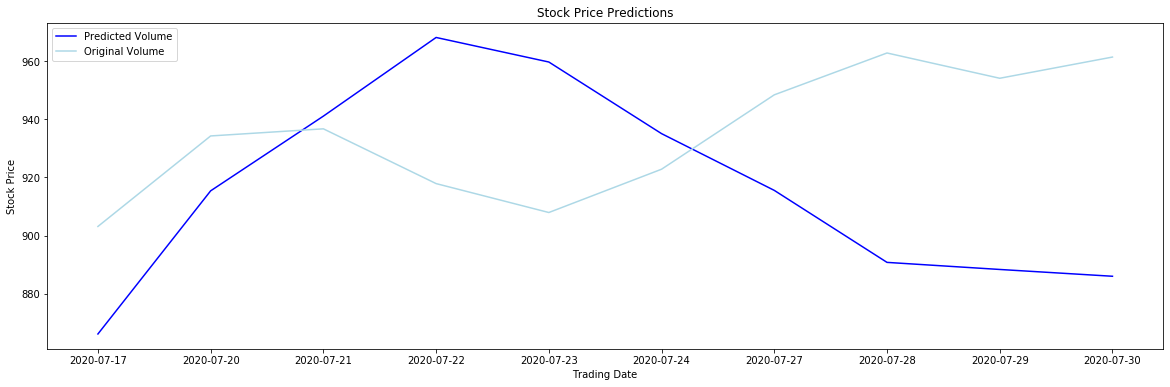

In [87]:
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

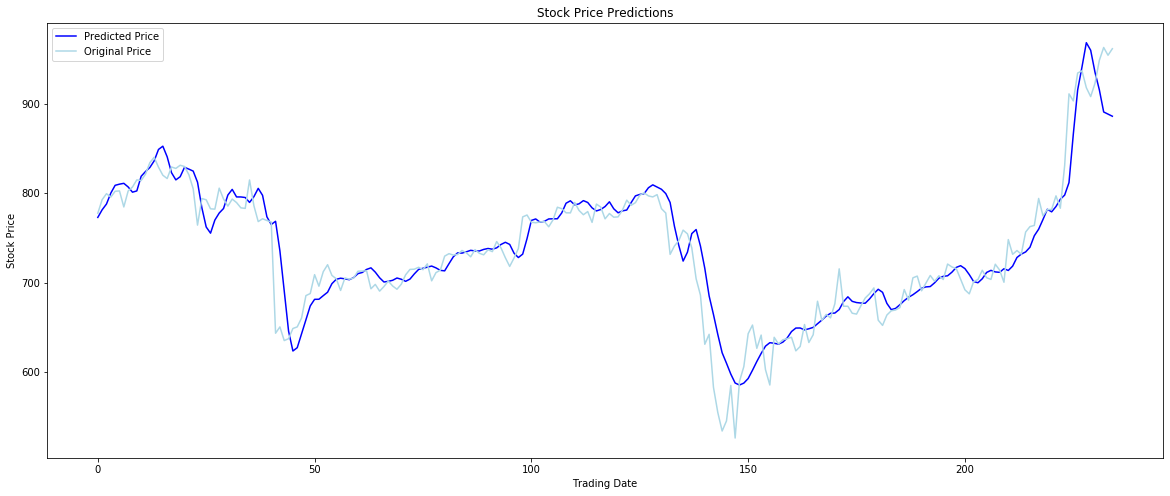

In [88]:
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

30th July ACCURACY -95.51%

31st July 2020

In [90]:
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 8,1)
endDate=datetime(2020, 7, 31)

# Fetching the data
StockData1=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData1.shape)
StockData1.head()

(246, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-08-01,INFY,EQ,793.65,786.45,788.40,764.40,770.25,768.85,774.33,10066407,7.794755e+14,216329,6020077,0.5980
2019-08-02,INFY,EQ,768.85,765.05,779.90,762.25,774.75,775.60,770.48,10838336,8.350680e+14,227612,6835374,0.6307
2019-08-05,INFY,EQ,775.60,772.60,785.90,768.65,776.80,776.70,777.83,9976238,7.759839e+14,281736,6166468,0.6181
2019-08-06,INFY,EQ,776.70,778.80,783.70,769.80,775.30,774.45,776.57,9331718,7.246766e+14,199427,6512914,0.6979
2019-08-07,INFY,EQ,774.45,778.90,783.45,772.35,776.05,776.10,778.99,5130457,3.996583e+14,157512,2955139,0.5760


In [91]:
StockData1['TradeDate']=StockData1.index
StockData1.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2020-07-27,INFY,EQ,922.85,921.55,952.80,918.65,947.15,948.45,939.16,16828218,1.580444e+15,278528,5906860,0.3510,2020-07-27
2020-07-28,INFY,EQ,948.45,946.00,967.55,941.20,960.60,962.85,953.58,15819466,1.508506e+15,220010,5480184,0.3464,2020-07-28
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890,2020-07-29
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773,2020-07-30
2020-07-31,INFY,EQ,961.45,969.25,986.45,953.30,967.75,966.00,971.12,12704359,1.233742e+15,195979,3201880,0.2520,2020-07-31


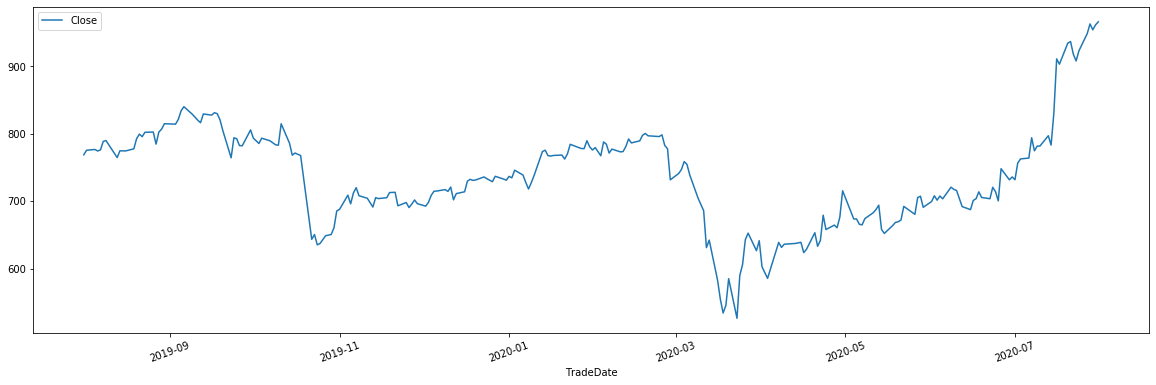

In [92]:
%matplotlib inline
StockData1.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [93]:
FullData=StockData1[['Close']].values
FullData[0:5]

array([[768.85],
       [775.6 ],
       [776.7 ],
       [774.45],
       [776.1 ]])

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)

X[0:5]

array([[0.5514731 ],
       [0.56682971],
       [0.56933227],
       [0.5642134 ],
       [0.56796724]])

In [95]:
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [96]:
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(236, 10, 1)

In [97]:
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(236, 1)

In [98]:
TestingRecords=10

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [99]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(226, 10, 1)
(226, 1)
(10, 10, 1)
(10, 1)


In [100]:
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.5514731 ]
 [0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]] --> [0.57149357]
[[0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]] --> [0.60584689]
[[0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]] --> [0.62108975]
[[0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]] --> [0.6125583]
[[0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]
 [0.6125583 ]] --> [0.62734615]


In [101]:
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [103]:
import time
StartTime=time.time()

regressor.fit(X_train, y_train, batch_size = 7, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
33/33 [==============================] - 0s 13ms/step - loss: 0.1983
Epoch 2/100
33/33 [==============================] - 0s 13ms/step - loss: 0.1050
Epoch 3/100
33/33 [==============================] - 0s 15ms/step - loss: 0.0176
Epoch 4/100
33/33 [==============================] - 0s 14ms/step - loss: 0.0127
Epoch 5/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0122
Epoch 6/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0109
Epoch 7/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 8/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0097
Epoch 9/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 10/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0091
Epoch 11/100
33/33 [==============================] - 0s 14ms/step - loss: 0.0091
Epoch 12/100
33/33 [==============================] - 0s 13ms/step - loss: 0.0089
Epoch 13/100
33/33 [=====

In [107]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[ 879.07043],
       [ 928.5044 ],
       [ 975.8478 ],
       [1005.965  ],
       [1007.3672 ],
       [ 991.87317],
       [ 976.1571 ],
       [ 952.8768 ],
       [ 934.3079 ],
       [ 946.12665]], dtype=float32)

In [108]:
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[934.3 ],
       [936.75],
       [917.9 ],
       [907.95],
       [922.85],
       [948.45],
       [962.85],
       [954.15],
       [961.45],
       [966.  ]])

In [109]:
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

95.59677272963613

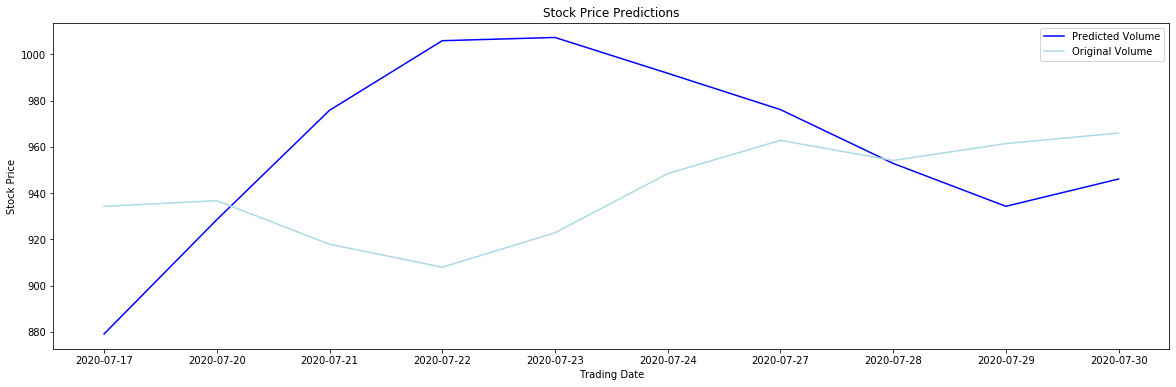

In [110]:
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

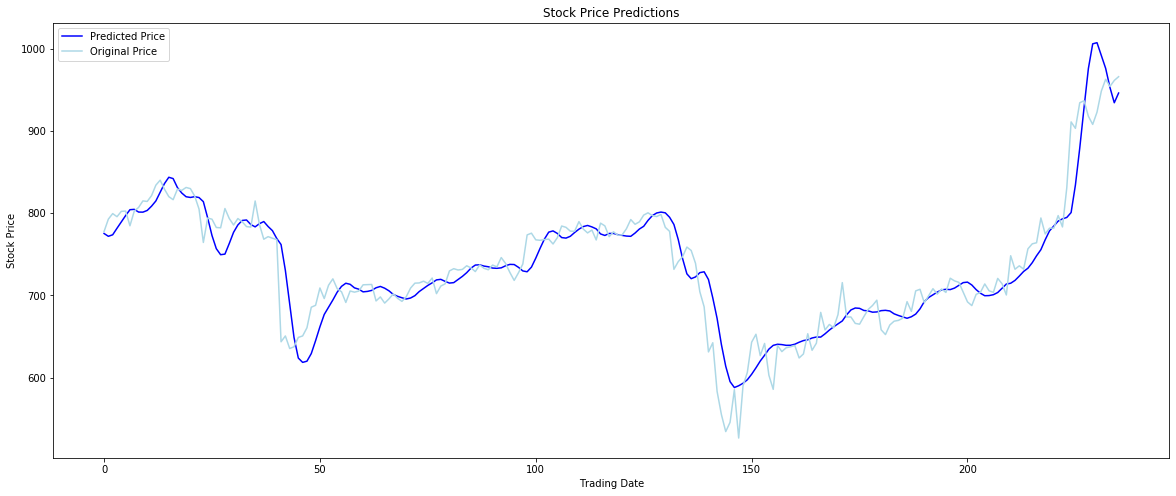

In [111]:
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

31st July 2020- Accuracy-95.59%

#### Date:- 03rd Aug 2020

In [112]:
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 8,1)
endDate=datetime(2020, 8,3)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.tail()

(247, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-07-28,INFY,EQ,948.45,946.00,967.55,941.20,960.60,962.85,953.58,15819466,1.508506e+15,220010,5480184,0.3464
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773
2020-07-31,INFY,EQ,961.45,969.25,986.45,953.30,967.75,966.00,971.12,12704359,1.233742e+15,195979,3201880,0.2520
2020-08-03,INFY,EQ,966.00,960.00,965.40,947.45,955.30,956.90,954.94,8480166,8.098077e+14,164566,4108547,0.4845


In [113]:
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2020-07-28,INFY,EQ,948.45,946.00,967.55,941.20,960.60,962.85,953.58,15819466,1.508506e+15,220010,5480184,0.3464,2020-07-28
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890,2020-07-29
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773,2020-07-30
2020-07-31,INFY,EQ,961.45,969.25,986.45,953.30,967.75,966.00,971.12,12704359,1.233742e+15,195979,3201880,0.2520,2020-07-31
2020-08-03,INFY,EQ,966.00,960.00,965.40,947.45,955.30,956.90,954.94,8480166,8.098077e+14,164566,4108547,0.4845,2020-08-03


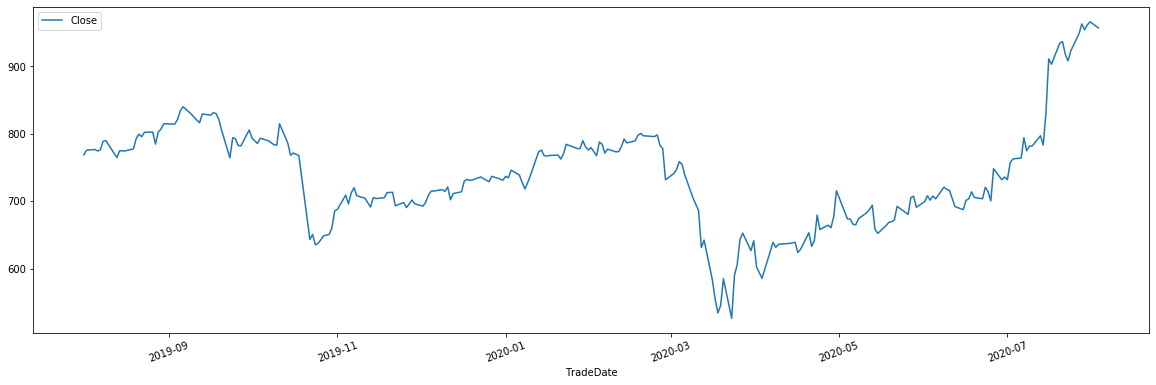

In [114]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [115]:
FullData=StockData[['Close']].values
FullData[0:5]

array([[768.85],
       [775.6 ],
       [776.7 ],
       [774.45],
       [776.1 ]])

In [116]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)

X[0:5]

array([[0.5514731 ],
       [0.56682971],
       [0.56933227],
       [0.5642134 ],
       [0.56796724]])

In [117]:
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [118]:
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(237, 10, 1)

In [119]:
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(237, 1)

In [120]:
TestingRecords=10

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [121]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(227, 10, 1)
(227, 1)
(10, 10, 1)
(10, 1)


In [122]:
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.5514731 ]
 [0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]] --> [0.57149357]
[[0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]] --> [0.60584689]
[[0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]] --> [0.62108975]
[[0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]] --> [0.6125583]
[[0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]
 [0.6125583 ]] --> [0.62734615]


In [123]:
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [124]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 4, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [125]:
import time
StartTime=time.time()

regressor.fit(X_train, y_train, batch_size = 8, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
29/29 [==============================] - 0s 12ms/step - loss: 0.2131
Epoch 2/100
29/29 [==============================] - 1s 18ms/step - loss: 0.1690
Epoch 3/100
29/29 [==============================] - 0s 14ms/step - loss: 0.1184
Epoch 4/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0515
Epoch 5/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0167
Epoch 6/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0146
Epoch 7/100
29/29 [==============================] - 0s 14ms/step - loss: 0.0138
Epoch 8/100
29/29 [==============================] - 0s 16ms/step - loss: 0.0130: 0s - loss: 0.
Epoch 9/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 10/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 11/100
29/29 [==============================] - 0s 13ms/step - loss: 0.0112
Epoch 12/100
29/29 [==============================] - 0s 12ms/step - loss: 0.0108
Epoch 13/1

In [126]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[ 809.181  ],
       [ 830.80475],
       [ 859.70514],
       [ 891.3318 ],
       [ 926.49945],
       [ 962.6072 ],
       [1005.3335 ],
       [1038.1499 ],
       [1051.4834 ],
       [1069.2001 ]], dtype=float32)

In [127]:
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[936.75],
       [917.9 ],
       [907.95],
       [922.85],
       [948.45],
       [962.85],
       [954.15],
       [961.45],
       [966.  ],
       [956.9 ]])

In [128]:
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

93.18978586364683

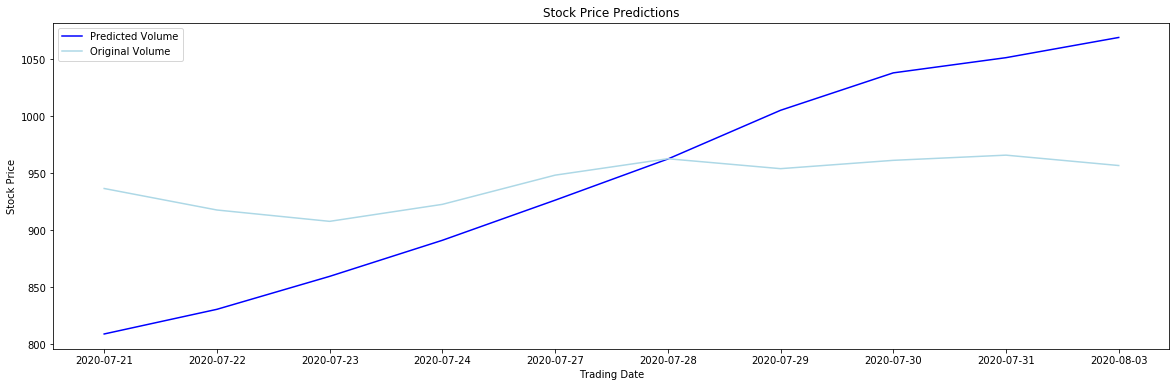

In [129]:
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

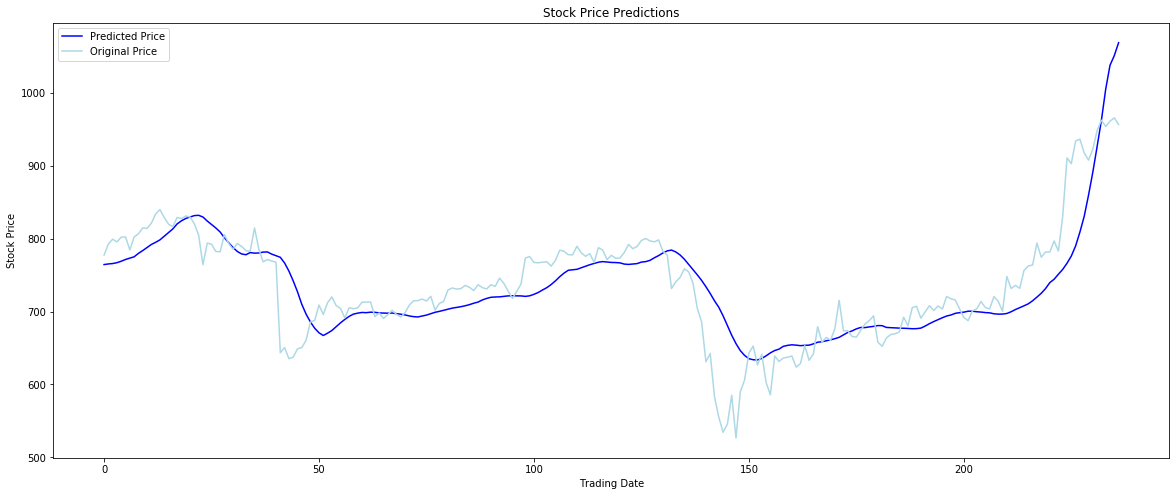

In [130]:
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

03/08/2020- ACCURACY 93.18

04th Aug 2020

In [131]:
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 8,1)
endDate=datetime(2020, 8,4)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.tail()

(248, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773
2020-07-31,INFY,EQ,961.45,969.25,986.45,953.30,967.75,966.00,971.12,12704359,1.233742e+15,195979,3201880,0.2520
2020-08-03,INFY,EQ,966.00,960.00,965.40,947.45,955.30,956.90,954.94,8480166,8.098077e+14,164566,4108547,0.4845
2020-08-04,INFY,EQ,956.90,960.45,970.70,940.55,952.00,949.85,949.99,11133259,1.057652e+15,166839,5087564,0.4570


In [132]:
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2020-07-29,INFY,EQ,962.85,953.25,960.00,943.60,951.95,954.15,952.22,11152710,1.061982e+15,212215,4338542,0.3890,2020-07-29
2020-07-30,INFY,EQ,954.15,962.00,972.65,958.75,962.15,961.45,965.59,12492569,1.206274e+15,222807,5962965,0.4773,2020-07-30
2020-07-31,INFY,EQ,961.45,969.25,986.45,953.30,967.75,966.00,971.12,12704359,1.233742e+15,195979,3201880,0.2520,2020-07-31
2020-08-03,INFY,EQ,966.00,960.00,965.40,947.45,955.30,956.90,954.94,8480166,8.098077e+14,164566,4108547,0.4845,2020-08-03
2020-08-04,INFY,EQ,956.90,960.45,970.70,940.55,952.00,949.85,949.99,11133259,1.057652e+15,166839,5087564,0.4570,2020-08-04


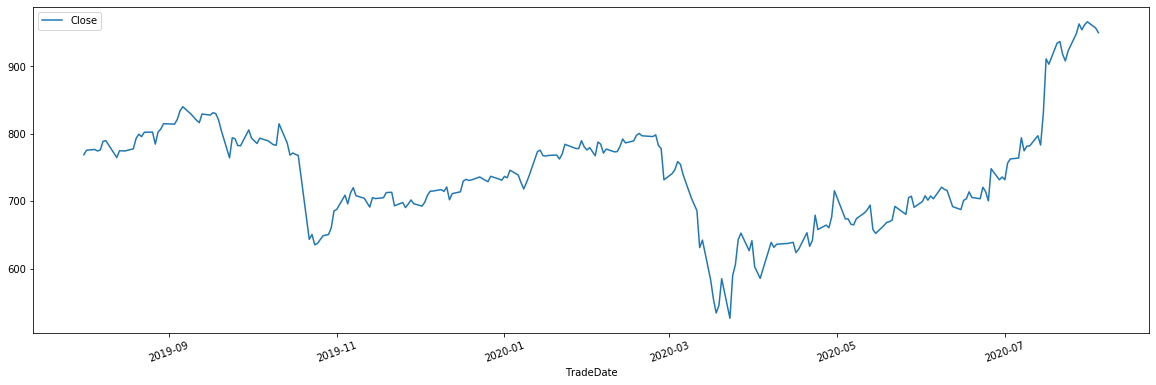

In [133]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

In [134]:
FullData=StockData[['Close']].values
FullData[0:5]

array([[768.85],
       [775.6 ],
       [776.7 ],
       [774.45],
       [776.1 ]])

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)

X[0:5]

array([[0.5514731 ],
       [0.56682971],
       [0.56933227],
       [0.5642134 ],
       [0.56796724]])

In [136]:
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  

for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [137]:
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(238, 10, 1)

In [138]:
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(238, 1)

In [139]:
TestingRecords=10

X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [140]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(228, 10, 1)
(228, 1)
(10, 10, 1)
(10, 1)


In [141]:
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.5514731 ]
 [0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]] --> [0.57149357]
[[0.56682971]
 [0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]] --> [0.60584689]
[[0.56933227]
 [0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]] --> [0.62108975]
[[0.5642134 ]
 [0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]] --> [0.6125583]
[[0.56796724]
 [0.59674667]
 [0.59924923]
 [0.54214538]
 [0.56500967]
 [0.56444091]
 [0.57149357]
 [0.60584689]
 [0.62108975]
 [0.6125583 ]] --> [0.62734615]


In [142]:
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


In [143]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

regressor = Sequential()

regressor.add(LSTM(units = 4, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [145]:
import time
StartTime=time.time()

regressor.fit(X_train, y_train, batch_size = 6, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 2/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0078
Epoch 3/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0071
Epoch 6/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0069
Epoch 7/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0069
Epoch 8/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0072
Epoch 9/100
38/38 [==============================] - 0s 11ms/step - loss: 0.0070
Epoch 10/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0064
Epoch 11/100
38/38 [==============================] - 0s 9ms/step - loss: 0.0060
Epoch 12/100
38/38 [==============================] - 0s 10ms/step - loss: 0.0065
Epoch 13/100
38/38 [===========

In [146]:
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[1012.16907],
       [ 987.55536],
       [ 957.8317 ],
       [ 957.0311 ],
       [ 977.69574],
       [ 995.33966],
       [ 987.1771 ],
       [ 998.06104],
       [1008.0018 ],
       [1000.977  ]], dtype=float32)

In [147]:
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[917.9 ],
       [907.95],
       [922.85],
       [948.45],
       [962.85],
       [954.15],
       [961.45],
       [966.  ],
       [956.9 ],
       [949.85]])

In [148]:
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

95.3690406617137

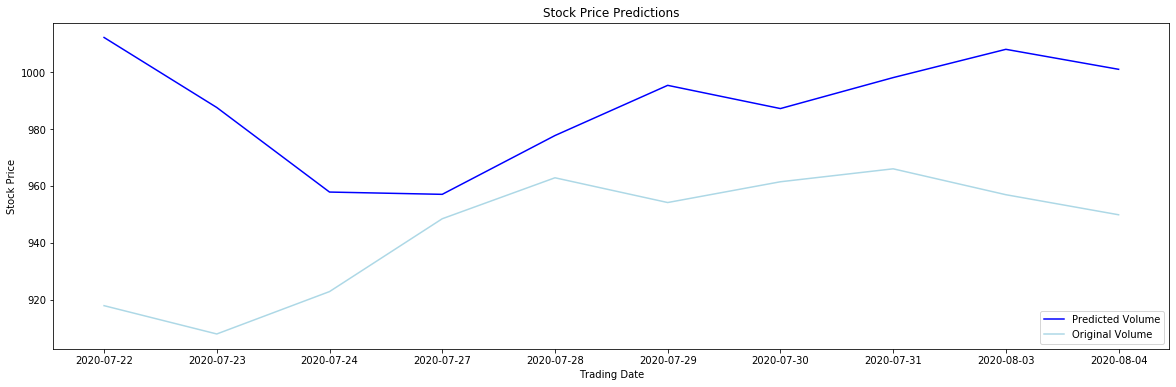

In [149]:
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

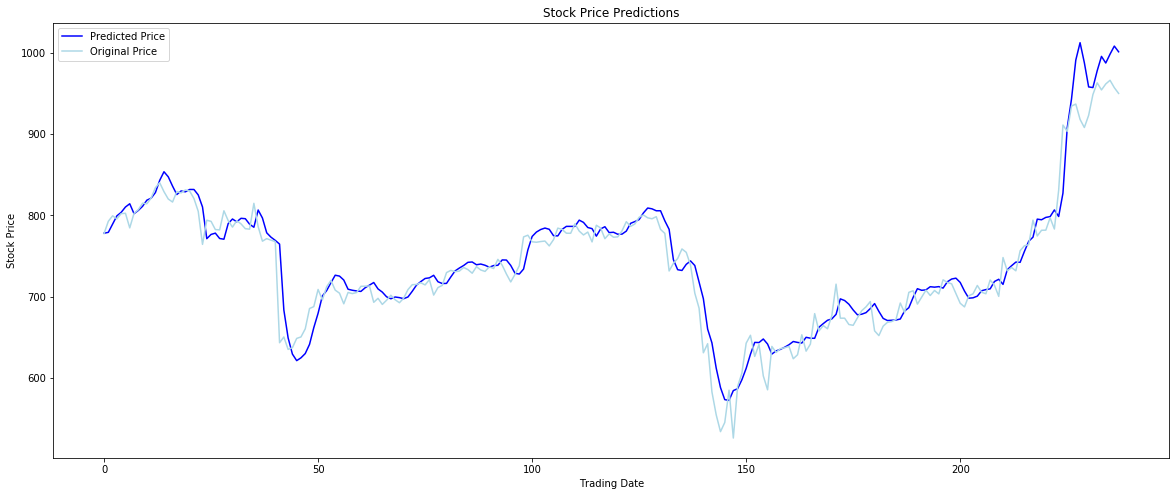

In [150]:
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

DAY 4 - ACCURACY 95.36